In [1]:
import pandas as pd
import pickle
from pathlib import Path
from ast import literal_eval

dataframe_smiles_bart = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_smiles_pretrained_BART_26_8.csv").set_index("SMILES")
dataframe_smiles_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_smiles_pretrained_roberta_26_8.csv").set_index("SMILES")
dataframe_selfies_bart = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_selfies_pretrained_BART_26_8.csv").set_index("SELFIES")
dataframe_selfies_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_selfies_pretrained_roberta_26_8.csv").set_index("SELFIES")

def unpickle(path: Path):
    """Load and deserialize a pickled object from disk.

    Args:
        path: File path containing the pickled object.

    Returns:
        The deserialized Python object.

    Raises:
        FileNotFoundError: If the specified path doesn't exist.
        pickle.UnpicklingError: If the file cannot be unpickled.

    Example:
        >>> data = unpickle(Path("data.pkl"))
    """
    path = Path(path)
    with open(path, "rb") as f:
        return pickle.load(f)
    
mapping = unpickle(Path("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/smilestoatomtypestoselfies_dikt_22_8.pkl"))

rows = []
for smiles, smiles_info in mapping.items():
    smiles_bart_embeddings = literal_eval(dataframe_smiles_bart.loc[smiles]["embedding"])
    smiles_roberta_embeddings = literal_eval(dataframe_smiles_roberta.loc[smiles]["embedding"])
    selfies = smiles_info["selfies"]
    selfies_bart_embeddings = literal_eval(dataframe_selfies_bart.loc[selfies]["embedding"])
    selfies_roberta_embeddings = literal_eval(dataframe_selfies_roberta.loc[selfies]["embedding"])
    inverted_atom_dict = {val: key[0] for key, val in smiles_info["selfies_map"].items()}
    for pos_it, smiles_position_to_keep in enumerate(smiles_info['posToKeep']):
        curr_row = {"SMILES":smiles, "SMILES_pos": smiles_position_to_keep,"smiles_token":smiles_info["smi_clean"][pos_it] ,"label":smiles_info["atom_types"][pos_it]}
        smiles_bart_emb = {f"SMILES_BART_emb_{it}": emb for it, emb in enumerate(smiles_bart_embeddings[smiles_position_to_keep][0])}
        smiles_roberta_emb = {f"SMILES_roberta_emb_{it}": emb for it, emb in enumerate(smiles_roberta_embeddings[smiles_position_to_keep][0])}
        selfies_position_to_keep = inverted_atom_dict[smiles_position_to_keep]
        selfies_bart_emb = {f"SELFIES_BART_emb_{it}": emb for it, emb in enumerate(selfies_bart_embeddings[selfies_position_to_keep][0])}
        selfies_roberta_emb = {f"SELFIES_roberta_emb_{it}": emb for it, emb in enumerate(selfies_roberta_embeddings[selfies_position_to_keep][0])}
        curr_row = curr_row | smiles_bart_emb | smiles_roberta_emb | selfies_bart_emb | selfies_roberta_emb
        rows.append(curr_row)
comb_dataframe = pd.DataFrame(rows)

In [2]:
comb_dataframe["Element"] = comb_dataframe["smiles_token"].str.lstrip("[").str.upper().str.slice(0,1)

In [3]:
comb_dataframe.to_csv("comb_annotations.csv")

# Wie splitten und welche Gruppen?

Element C
c3    2397
ca    1991
c      267
cc     189
cd     155
c2     141
cx      73
ce      60
cy      33
cp      30
cg      19
c1      16
cs      13
cf      10
ch       2
cq       2
Name: label, dtype: int64


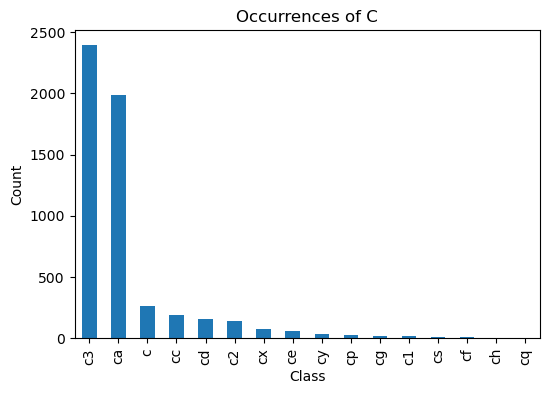

Element N
ns    130
nb     83
na     80
nd     65
n      54
nu     48
nc     33
nv     31
n1     30
nh     23
n2     21
n7     12
n3      9
n8      7
nt      7
nj      2
ne      1
Name: label, dtype: int64


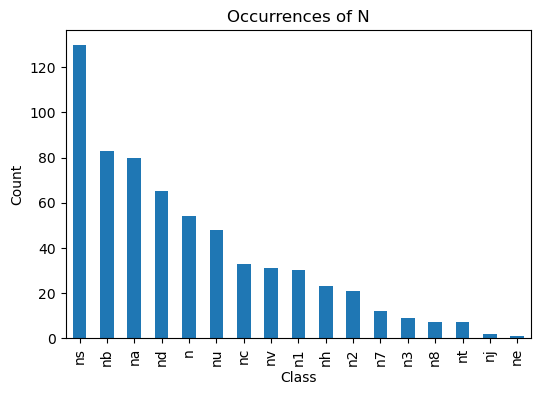

Element S
ss    86
sy    19
s     13
s6    11
sh     4
s4     2
sq     1
Name: label, dtype: int64


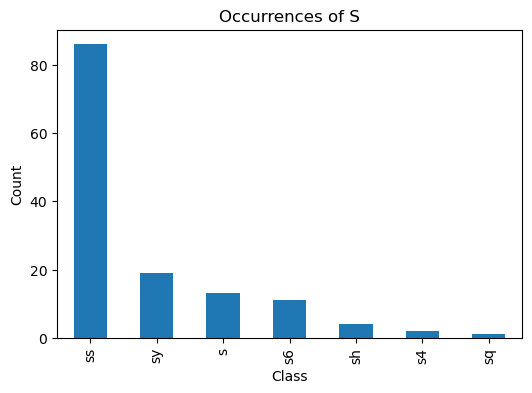

Element O
o     337
os    275
oh     95
op      3
Name: label, dtype: int64


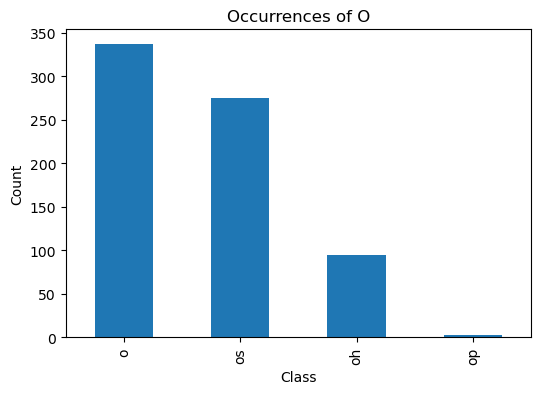

Element F
f    66
Name: label, dtype: int64


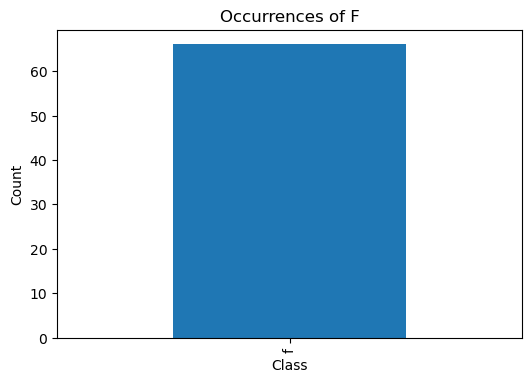

Element P
p5    7
p3    2
Name: label, dtype: int64


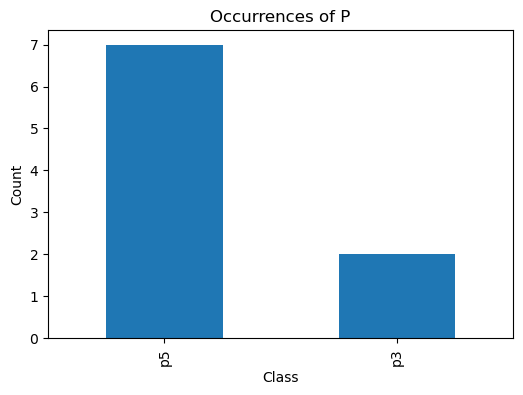

Element I
i    8
Name: label, dtype: int64


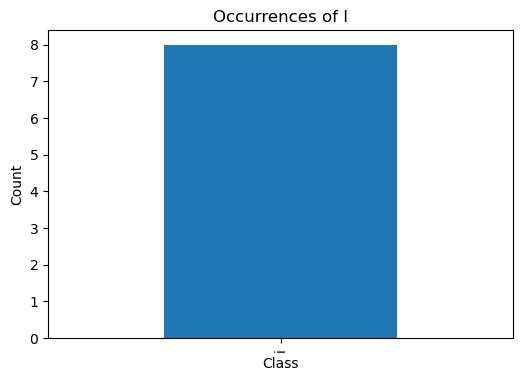

In [21]:
#comb_dataframe[comb_dataframe.Element=="C"].histogram()
import matplotlib.pyplot as plt 

for element in comb_dataframe.Element.unique():
    print(f"Element {element}")
    class_counts = comb_dataframe[comb_dataframe.Element==element]["label"].value_counts()
    print(class_counts)
    # Plot bar chart
    class_counts.plot(kind='bar', figsize=(6,4), title=f'Occurrences of {element}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

In [11]:
fd = [1,2,3]
q = [3,4]
fd + q +fd

[1, 2, 3, 3, 4, 1, 2, 3]

In [55]:
from sklearn.model_selection import StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=3)
splits = sgkf.split(comb_dataframe, y=comb_dataframe["label"], groups=comb_dataframe["SMILES"])

In [ ]:
import pandas as pd
import pickle
from pathlib import Path
from ast import literal_eval

dataframe_smiles_bart = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_smiles_pretrained_BART_26_8.csv").set_index("SMILES")
dataframe_smiles_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_smiles_pretrained_roberta_26_8.csv").set_index("SMILES")
dataframe_selfies_bart = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_selfies_pretrained_BART_26_8.csv").set_index("SELFIES")
dataframe_selfies_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/embeds_selfies_pretrained_roberta_26_8.csv").set_index("SELFIES")

def unpickle(path: Path):
    """Load and deserialize a pickled object from disk.

    Args:
        path: File path containing the pickled object.

    Returns:
        The deserialized Python object.

    Raises:
        FileNotFoundError: If the specified path doesn't exist.
        pickle.UnpicklingError: If the file cannot be unpickled.

    Example:
        >>> data = unpickle(Path("data.pkl"))
    """
    path = Path(path)
    with open(path, "rb") as f:
        return pickle.load(f)
    
mapping = unpickle(Path("/scratch/ifender/SOS_tmp/embeddings_pretrainingdata/smilestoatomtypestoselfies_dikt_22_8.pkl"))

rows = []
for smiles, smiles_info in mapping.items():
    smiles_bart_embeddings = literal_eval(dataframe_smiles_bart.loc[smiles]["embedding"])
    smiles_roberta_embeddings = literal_eval(dataframe_smiles_roberta.loc[smiles]["embedding"])
    selfies = smiles_info["selfies"]
    selfies_bart_embeddings = literal_eval(dataframe_selfies_bart.loc[selfies]["embedding"])
    selfies_roberta_embeddings = literal_eval(dataframe_selfies_roberta.loc[selfies]["embedding"])
    inverted_atom_dict = {val: key[0] for key, val in smiles_info["selfies_map"].items()}
    for pos_it, smiles_position_to_keep in enumerate(smiles_info['posToKeep']):
        curr_row = {"SMILES":smiles, "SMILES_pos": smiles_position_to_keep,"smiles_token":smiles_info["smi_clean"][pos_it] ,"label":smiles_info["atom_types"][pos_it]}
        smiles_bart_emb = {f"SMILES_BART_emb_{it}": emb for it, emb in enumerate(smiles_bart_embeddings[smiles_position_to_keep][0])}
        smiles_roberta_emb = {f"SMILES_roberta_emb_{it}": emb for it, emb in enumerate(smiles_roberta_embeddings[smiles_position_to_keep][0])}
        selfies_position_to_keep = inverted_atom_dict[smiles_position_to_keep]
        selfies_bart_emb = {f"SELFIES_BART_emb_{it}": emb for it, emb in enumerate(selfies_bart_embeddings[selfies_position_to_keep][0])}
        selfies_roberta_emb = {f"SELFIES_roberta_emb_{it}": emb for it, emb in enumerate(selfies_roberta_embeddings[selfies_position_to_keep][0])}
        curr_row = curr_row | smiles_bart_emb | smiles_roberta_emb | selfies_bart_emb | selfies_roberta_emb
        rows.append(curr_row)
comb_dataframe = pd.DataFrame(rows)

In [22]:
eth_mapping = pd.read_csv("/scratch/ifender/SOS_tmp/ETH_dataset/ETH_extended.csv")
eth_mapping

,Unnamed: 0,atom_idx,element,mulliken,resp1,resp2,dual,cnf_idx,mbis_dipole_strength,DASH_IDX,comp_key,SMILES,CHEMBL_ID,selfies,selfies_toks,selfies_map,tokenized_SMILES,cleaned_tokenized_SMILES,cleaned_tokenized_SMILES_pos
0,0,0,C,-0.290919,-0.287521,-0.287521,-0.001670,0,0.042085,QMUGS500_1,conf_00QMUGS500_1,C#[N+][O-],CHEMBL185198,[C][#N+1][O-1],"['[C]', '[#N+1]', '[O-1]']","{(0, '[C]'): 0, (1, '[#N+1]'): 2, (2, '[O-1]')...","['C', '#', '[N+]', '[O-]']","['C', '[N+]', '[O-]']","[0, 2, 3]"
1,1,1,N,0.419352,0.458319,0.458319,0.195391,0,0.200745,QMUGS500_1,conf_00QMUGS500_1,C#[N+][O-],CHEMBL185198,[C][#N+1][O-1],"['[C]', '[#N+1]', '[O-1]']","{(0, '[C]'): 0, (1, '[#N+1]'): 2, (2, '[O-1]')...","['C', '#', '[N+]', '[O-]']","['C', '[N+]', '[O-]']","[0, 2, 3]"
2,2,2,O,-0.397038,-0.535125,-0.535125,-0.351755,0,0.048333,QMUGS500_1,conf_00QMUGS500_1,C#[N+][O-],CHEMBL185198,[C][#N+1][O-1],"['[C]', '[#N+1]', '[O-1]']","{(0, '[C]'): 0, (1, '[#N+1]'): 2, (2, '[O-1]')...","['C', '#', '[N+]', '[O-]']","['C', '[N+]', '[O-]']","[0, 2, 3]"
3,3,0,C,-0.387290,-0.449151,-0.449151,0.157883,0,0.050744,QMUGS500_17,conf_00QMUGS500_17,C=C=CCN,CHEMBL3951138,[C][=C][=C][C][N],"['[C]', '[=C]', '[=C]', '[C]', '[N]']","{(0, '[C]'): 0, (1, '[=C]'): 2, (2, '[=C]'): 4...","['C', '=', 'C', '=', 'C', 'C', 'N']","['C', 'C', 'C', 'C', 'N']","[0, 2, 4, 5, 6]"
4,4,1,C,0.022985,0.052905,0.052905,0.220494,0,0.014284,QMUGS500_17,conf_00QMUGS500_17,C=C=CCN,CHEMBL3951138,[C][=C][=C][C][N],"['[C]', '[=C]', '[=C]', '[C]', '[N]']","{(0, '[C]'): 0, (1, '[=C]'): 2, (2, '[=C]'): 4...","['C', '=', 'C', '=', 'C', 'C', 'N']","['C', 'C', 'C', 'C', 'N']","[0, 2, 4, 5, 6]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51778,1202828,31,C,-0.146984,-0.140720,-0.140720,-0.010001,0,0.032464,QMUGS500_178406,conf_00QMUGS500_178406,CCOC(=O)c1nn(-c2ccccc2)cc1C(=O)c1c(C)[nH]c(-c2...,CHEMBL3740131,[C][C][O][C][=Branch1][C][=O][C][=N][N][Branch...,"['[C]', '[C]', '[O]', '[C]', '[=Branch1]', '[C...","{(0, '[C]'): 0, (1, '[C]'): 1, (2, '[O]'): 2, ...","['C', 'C', 'O', 'C', '(', '=', 'O', ')', 'c', ...","['C', 'C', 'O', 'C', 'O', 'c', 'n', 'n', 'c', ...","[0, 1, 2, 3, 6, 8, 10, 11, 14, 16, 17, 18, 19,..."
51779,1202829,32,C,-0.150753,-0.234203,-0.234203,0.002689,0,0.031995,QMUGS500_178406,conf_00QMUGS500_178406,CCOC(=O)c1nn(-c2ccccc2)cc1C(=O)c1c(C)[nH]c(-c2...,CHEMBL3740131,[C][C][O][C][=Branch1][C][=O][C][=N][N][Branch...,"['[C]', '[C]', '[O]', '[C]', '[=Branch1]', '[C...","{(0, '[C]'): 0, (1, '[C]'): 1, (2, '[O]'): 2, ...","['C', 'C', 'O', 'C', '(', '=', 'O', ')', 'c', ...","['C', 'C', 'O', 'C', 'O', 'c', 'n', 'n', 'c', ...","[0, 1, 2, 3, 6, 8, 10, 11, 14, 16, 17, 18, 19,..."
51780,1202830,33,C,-0.114835,-0.079794,-0.079794,-0.025959,0,0.031209,QMUGS500_178406,conf_00QMUGS500_178406,CCOC(=O)c1nn(-c2ccccc2)cc1C(=O)c1c(C)[nH]c(-c2...,CHEMBL3740131,[C][C][O][C][=Branch1][C][=O][C][=N][N][Branch...,"['[C]', '[C]', '[O]', '[C]', '[=Branch1]', '[C...","{(0, '[C]'): 0, (1, '[C]'): 1, (2, '[O]'): 2, ...","['C', 'C', 'O', 'C', '(', '=', 'O', ')', 'c', ...","['C', 'C', 'O', 'C', 'O', 'c', 'n', 'n', 'c', ...","[0, 1, 2, 3, 6, 8, 10, 11, 14, 16, 17, 18, 19,..."
51781,1202831,34,C,-0.131449,-0.221236,-0.221236,0.003776,0,0.028161,QMUGS500_178406,conf_00QMUGS500_178406,CCOC(=O)c1nn(-c2ccccc2)cc1C(=O)c1c(C)[nH]c(-c2...,CHEMBL3740131,[C][C][O][C][=Branch1][C][=O][C][=N][N][Branch...,"['[C]', '[C]', '[O]', '[C]', '[=Branch1]', '[C...","{(0, '[C]'): 0, (1, '[C]'): 1, (2, '[O]'): 2, ...","['C', 'C', 'O', 'C', '(', '=', 'O', ')', 'c', ...","['C', 'C', 'O', 'C', 'O', 'c', 'n', 'n', 'c', ...","[0, 1, 2, 3, 6, 8, 10, 11, 14, 16, 17, 18, 19,..."


In [29]:
eth_mapping[["SMILES","selfies_toks","selfies_map","tokenized_SMILES","cleaned_tokenized_SMILES_pos"]].groupby("SMILES").agg("first")

,selfies_toks,selfies_map,tokenized_SMILES,cleaned_tokenized_SMILES_pos
SMILES,,,,
C#CC/N=C(/N)NCCC[C@@H](N)C(=O)O,"['[C]', '[#C]', '[C]', '[/N]', '[=C]', '[Branc...","{(0, '[C]'): 0, (1, '[#C]'): 2, (2, '[C]'): 3,...","['C', '#', 'C', 'C', '/', 'N', '=', 'C', '(', ...","[0, 2, 3, 5, 7, 10, 12, 13, 14, 15, 16, 18, 20..."
C#CCCSc1c(CCCC)c(C)nc2ccc(OC)cc12,"['[C]', '[#C]', '[C]', '[C]', '[S]', '[C]', '[...","{(0, '[C]'): 0, (1, '[#C]'): 2, (2, '[C]'): 3,...","['C', '#', 'C', 'C', 'C', 'S', 'c', '1', 'c', ...","[0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 15, 17, ..."
C#CCN(C)C(=O)c1nc2ccccc2c(-c2ccccc2)c1C,"['[C]', '[#C]', '[C]', '[N]', '[Branch1]', '[C...","{(0, '[C]'): 0, (1, '[#C]'): 2, (2, '[C]'): 3,...","['C', '#', 'C', 'C', 'N', '(', 'C', ')', 'C', ...","[0, 2, 3, 4, 6, 8, 11, 13, 15, 16, 18, 19, 20,..."
C#CCN(C)C[C@@H]1O[C@H](C2CCCCC2)Cc2c1ccc(O)c2O,"['[C]', '[#C]', '[C]', '[N]', '[Branch1]', '[C...","{(0, '[C]'): 0, (1, '[#C]'): 2, (2, '[C]'): 3,...","['C', '#', 'C', 'C', 'N', '(', 'C', ')', 'C', ...","[0, 2, 3, 4, 6, 8, 9, 11, 12, 14, 16, 17, 18, ..."
C#CCN(C)C[C@H](O)COc1ccc2ccccc2c1,"['[C]', '[#C]', '[C]', '[N]', '[Branch1]', '[C...","{(0, '[C]'): 0, (1, '[#C]'): 2, (2, '[C]'): 3,...","['C', '#', 'C', 'C', 'N', '(', 'C', ')', 'C', ...","[0, 2, 3, 4, 6, 8, 9, 11, 13, 14, 15, 17, 18, ..."
...,...,...,...,...
c1csc(C2=NCCN2)c1,"['[C]', '[=C]', '[S]', '[C]', '[Branch1]', '[B...","{(0, '[C]'): 0, (1, '[=C]'): 2, (2, '[S]'): 3,...","['c', '1', 'c', 's', 'c', '(', 'C', '2', '=', ...","[0, 2, 3, 4, 6, 9, 10, 11, 12, 15]"
c1csc([C@]23CNC[C@H]2C3)c1,"['[C]', '[=C]', '[S]', '[C]', '[Branch1]', '[O...","{(0, '[C]'): 0, (1, '[=C]'): 2, (2, '[S]'): 3,...","['c', '1', 'c', 's', 'c', '(', '[C@]', '2', '3...","[0, 2, 3, 4, 6, 9, 10, 11, 12, 14, 17]"
c1nc(COCCC2CCCCC2)c[nH]1,"['[C]', '[=N]', '[C]', '[Branch1]', '[=N]', '[...","{(0, '[C]'): 0, (1, '[=N]'): 2, (2, '[C]'): 3,...","['c', '1', 'n', 'c', '(', 'C', 'O', 'C', 'C', ...","[0, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1..."


In [32]:
eth_mapping[["SMILES","selfies_toks","selfies_map","tokenized_SMILES","cleaned_tokenized_SMILES_pos"]].groupby("SMILES").agg("first").loc["C#[N+][O-]"]

selfies_toks                                           ['[C]', '[#N+1]', '[O-1]']
selfies_map                     {(0, '[C]'): 0, (1, '[#N+1]'): 2, (2, '[O-1]')...
tokenized_SMILES                                       ['C', '#', '[N+]', '[O-]']
cleaned_tokenized_SMILES_pos                                            [0, 2, 3]
Name: C#[N+][O-], dtype: object

# FILTERING/REMOVAL

In [80]:
def get_elem(string:str):
    return ''.join(filter(str.isalnum, string.upper()))[0]

dataframe_smiles_bart = pd.read_csv("/scratch/ifender/SOS_tmp/ETH_dataset/embeds_smiles_pretrained_BART_26_8.csv").set_index("SMILES")
dataframe_smiles_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/ETH_dataset/embeds_smiles_pretrained_roberta_26_8.csv").set_index("SMILES")
dataframe_selfies_bart = pd.read_csv("/scratch/ifender/SOS_tmp/ETH_dataset/embeds_selfies_pretrained_BART_26_8.csv").set_index("SELFIES")
dataframe_selfies_roberta = pd.read_csv("/scratch/ifender/SOS_tmp/ETH_dataset/embeds_selfies_pretrained_roberta_26_8.csv").set_index("SELFIES")

rows = []
removed_mols = 0
kept_mols = 0
for smiles, row in eth_mapping[["SMILES","selfies","selfies_toks","selfies_map","tokenized_SMILES","cleaned_tokenized_SMILES_pos"]].groupby("SMILES").agg("first").iterrows():
    fail = False
    inverted_dict_selfies = {val:key[0] for key, val in literal_eval(row["selfies_map"]).items() }
    curr_rows = []
    #print(row)
    #smiles = row["SMILES"]
    tokenized_SMILES = literal_eval(row["tokenized_SMILES"])
    tokenized_SELFIES = literal_eval(row["selfies_toks"])
    smiles_bart_embeddings = literal_eval(dataframe_smiles_bart.loc[smiles]["embedding"])
    smiles_roberta_embeddings = literal_eval(dataframe_smiles_roberta.loc[smiles]["embedding"])
    selfies = row["selfies"]
    selfies_bart_embeddings = literal_eval(dataframe_selfies_bart.loc[selfies]["embedding"])
    selfies_roberta_embeddings = literal_eval(dataframe_selfies_roberta.loc[selfies]["embedding"])
    
    for it, smiles_pos in enumerate(literal_eval(row["cleaned_tokenized_SMILES_pos"])):
        if not (smiles_pos in inverted_dict_selfies):
            fail=True
            removed_mols+=1
            break
        selfies_pos = inverted_dict_selfies[smiles_pos]
        smiles_tok = tokenized_SMILES[smiles_pos]
        selfies_tok = tokenized_SELFIES[selfies_pos]
        element = get_elem(smiles_tok)
        if not (element == get_elem(selfies_tok)):
            fail=True
            removed_mols+=1
            break
        curr = {"SMILES":smiles, "atom_idx":it,"element":element,"smiles_pos":smiles_pos, "selfies_pos": selfies_pos, "SMILES_tok": smiles_tok, "SELFIES_tok": selfies_tok,}
        smiles_bart_emb = {f"SMILES_BART_emb_{it}": emb for it, emb in enumerate(smiles_bart_embeddings[smiles_pos][0])}
        smiles_roberta_emb = {f"SMILES_roberta_emb_{it}": emb for it, emb in enumerate(smiles_roberta_embeddings[smiles_pos][0])}
        selfies_bart_emb = {f"SELFIES_BART_emb_{it}": emb for it, emb in enumerate(selfies_bart_embeddings[selfies_pos][0])}
        selfies_roberta_emb = {f"SELFIES_roberta_emb_{it}": emb for it, emb in enumerate(selfies_roberta_embeddings[selfies_pos][0])}
        curr = curr | smiles_bart_emb | smiles_roberta_emb | selfies_bart_emb | selfies_roberta_emb
        curr_rows = curr_rows+[curr]
    kept_mols +=1
    if not fail:
        rows = rows + curr_rows
print(f"kept mols: {kept_mols}, removed_mols: {removed_mols}")
merged = pd.merge(eth_mapping,pd.DataFrame(rows), on=["SMILES", "atom_idx"])
merged.shape

kept mols: 2521, removed_mols: 2


AttributeError: module 'pandas' has no attribute 'Dataframe'

In [81]:
merged = pd.merge(eth_mapping,pd.DataFrame(rows), on=["SMILES", "atom_idx"])
merged.shape

(51734, 3096)

In [87]:
merged[merged.element_x!=merged.element_y]

,Unnamed: 0,atom_idx,element_x,mulliken,resp1,resp2,dual,cnf_idx,mbis_dipole_strength,DASH_IDX,...,SELFIES_roberta_emb_758,SELFIES_roberta_emb_759,SELFIES_roberta_emb_760,SELFIES_roberta_emb_761,SELFIES_roberta_emb_762,SELFIES_roberta_emb_763,SELFIES_roberta_emb_764,SELFIES_roberta_emb_765,SELFIES_roberta_emb_766,SELFIES_roberta_emb_767
20239,131903,14,C,-0.281339,-0.235763,-0.235763,0.038999,0,0.019852,QMUGS500_27665,...,-0.992751,-1.247284,0.990726,-1.544188,-0.501675,0.651243,-1.988998,0.887794,-0.086305,-1.233278
20244,131908,19,N,-0.215890,-0.388954,-0.388954,-0.067886,0,0.045917,QMUGS500_27665,...,-1.477693,-0.887482,0.292743,-1.529737,-0.682313,-0.022201,-2.570391,0.354863,0.619985,-1.215914


# Post-processing check

In [88]:
merged[merged.DASH_IDX.isin(merged[merged.element_x!=merged.element_y].DASH_IDX.unique())]

,Unnamed: 0,atom_idx,element_x,mulliken,resp1,resp2,dual,cnf_idx,mbis_dipole_strength,DASH_IDX,...,SELFIES_roberta_emb_758,SELFIES_roberta_emb_759,SELFIES_roberta_emb_760,SELFIES_roberta_emb_761,SELFIES_roberta_emb_762,SELFIES_roberta_emb_763,SELFIES_roberta_emb_764,SELFIES_roberta_emb_765,SELFIES_roberta_emb_766,SELFIES_roberta_emb_767
20225,131889,0,C,-0.232095,-0.002637,0.002932,0.000252,0,0.168568,QMUGS500_27665,...,0.139210,-0.425854,0.158361,-1.259399,-0.132967,1.138025,-0.702160,0.317126,1.002440,-0.458844
20226,131890,1,O,-0.262865,-0.404549,-0.404549,0.005026,0,0.122456,QMUGS500_27665,...,-0.344357,-0.547129,0.264904,-1.436054,-0.216524,1.417773,-1.746211,0.178415,0.554907,-1.480393
20227,131891,2,C,0.311928,0.787964,0.787964,0.028382,0,0.080008,QMUGS500_27665,...,-0.801768,-0.460077,-0.482308,-2.047603,-0.683540,1.141506,-2.047405,0.315121,0.682394,-1.156223
20228,131892,3,O,-0.393566,-0.604723,-0.604723,0.014484,0,0.079082,QMUGS500_27665,...,-0.627935,-0.592108,0.264428,-1.495465,-0.608503,0.280394,-2.457612,0.629874,0.803441,-2.240560
20229,131893,4,C,-0.096853,-0.100247,-0.068499,0.003082,0,0.088870,QMUGS500_27665,...,-2.091837,-1.404396,0.230913,-1.458339,-0.554314,-0.275583,-2.640523,0.690038,0.767620,-2.117636
20230,131894,5,C,0.140580,0.113039,0.125520,0.004127,0,0.120224,QMUGS500_27665,...,-1.404503,-1.073090,0.391927,-1.651041,-0.741884,0.020502,-2.468240,0.330646,0.531863,-1.388288
20231,131895,6,C,-0.185130,-0.040590,-0.001830,0.000450,0,0.068159,QMUGS500_27665,...,-0.591867,-0.542976,-0.306425,-1.981630,-0.815649,1.235783,-2.339160,-0.018558,0.532550,-0.932989
20232,131896,7,C,-0.202567,-0.024905,-0.029499,0.000134,0,0.065396,QMUGS500_27665,...,-0.200888,-1.234657,-0.018399,-1.388134,-1.577297,0.205645,-2.812781,0.364465,0.791275,-1.207137
20233,131897,8,C,0.145681,0.229722,0.224534,-0.000082,0,0.116836,QMUGS500_27665,...,-0.879264,-0.638875,-0.199981,-1.717673,-0.650900,0.689210,-2.514290,0.358850,0.698961,-1.207894
20234,131898,9,C,-0.199808,-0.111086,-0.102810,-0.000503,0,0.070824,QMUGS500_27665,...,-0.873012,-1.292487,0.241376,-1.368053,-1.586581,0.138893,-2.803481,0.640195,0.533865,-1.191009


In [90]:
embeddings_cols = [column for column in merged.columns if "emb" in column  ]
merged[~(merged.DASH_IDX.isin(merged[merged.element_x!=merged.element_y].DASH_IDX.unique()))][["element_x", "mulliken","resp1","resp2","dual","mbis_dipole_strength","SMILES"]+embeddings_cols].to_csv("merged_eth_dataset.csv")